## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout, Activation
from keras.layers import TimeDistributed
from sklearn.ensemble import StackingClassifier

from tensorflow import keras
from keras import optimizers

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [7]:
from numpy import dstack
from sklearn.linear_model import LogisticRegression

## Reading Dataset

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Reading "csv" Dataset
Dataset = pd.read_csv("/content/drive/MyDrive/Project/Outputs/SAVEE_Features_Combined.csv")

In [10]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,139,140,141,142,143,144,145,146,147,labels
0,0.891084,0.033806,0.033111,0.595869,9.659194,21.865084,14.657446,26.055956,48.188286,57.217628,...,-6.759806,-1.404577,-7.749061,4.514760,-4.319347,-6.798388,-0.937824,-4.859028,-7.378529,happiness
1,0.992510,0.115383,0.112897,0.717496,9.752404,21.812602,14.762177,25.633570,47.725031,57.208579,...,-5.024803,-2.298325,-2.466918,0.868460,-0.779749,-3.724901,-1.261653,-3.115248,-5.149849,happiness
2,0.356943,0.011757,0.007314,0.051174,0.729597,2.490874,2.375560,8.371264,14.972178,12.979292,...,-6.260937,-3.008468,-6.202703,4.378581,-8.834075,-5.402733,-0.284534,-6.594661,-6.448785,happiness
3,6.519171,0.039830,0.215731,2.087920,6.649353,4.397666,4.603816,5.256814,4.088961,6.496548,...,-3.831077,-2.592651,-2.747179,6.166303,3.213481,-0.254544,0.335253,0.504263,-3.201196,neutral
4,6.535304,0.046004,0.225987,2.107937,6.652501,4.382972,4.595917,5.254234,4.103537,6.491094,...,-1.614392,0.377876,1.045155,1.378320,1.521758,0.945729,1.950349,1.057234,-0.017693,neutral


## Replacing Emotions to Values



In [11]:
Dataset = Dataset.replace("anger", 0)
Dataset = Dataset.replace("disgust", 1)
Dataset = Dataset.replace("fear", 2)
Dataset = Dataset.replace("happiness", 3)
Dataset = Dataset.replace("sadness", 4)
Dataset = Dataset.replace("surprise", 5)
Dataset = Dataset.replace("neutral", 6)

## Changing pandas dataframe to numpy array

In [12]:
X = Dataset.iloc[:,:148].values
Y = Dataset.iloc[:,148:].values

In [13]:
# Features

X

array([[ 8.91083539e-01,  3.38060595e-02,  3.31106074e-02, ...,
        -9.37824368e-01, -4.85902834e+00, -7.37852859e+00],
       [ 9.92509973e-01,  1.15382819e-01,  1.12897284e-01, ...,
        -1.26165345e+00, -3.11524803e+00, -5.14984929e+00],
       [ 3.56943130e-01,  1.17570795e-02,  7.31377769e-03, ...,
        -2.84533590e-01, -6.59466124e+00, -6.44878483e+00],
       ...,
       [ 4.97943722e-02,  6.77891367e-05,  2.39193835e-03, ...,
         2.15542459e+00,  6.45807981e+00,  4.90848970e+00],
       [ 5.03241417e-02,  3.69230522e-04,  2.70053646e-03, ...,
         3.16022045e+00,  3.33960470e+00,  2.84013935e+00],
       [ 4.93937619e-02,  2.12858631e-05,  4.10851906e-04, ...,
         2.58409524e+00,  7.42069960e+00,  1.95977342e+00]])

In [14]:
# Labels

Y

array([[3],
       [3],
       [3],
       ...,
       [0],
       [0],
       [0]])

## Normalizing the data


In [15]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [16]:
X

array([[-0.91526531, -0.08072411, -0.08505519, ..., -0.31234015,
        -0.65816744, -1.51108127],
       [-0.88357297, -0.01723236, -0.04702721, ..., -0.41214329,
        -0.27003632, -0.95097711],
       [-1.08216616, -0.09788499, -0.09735049, ..., -0.11099791,
        -1.04448509, -1.27742121],
       ...,
       [-1.17813979, -0.10698284, -0.09969634, ...,  0.64098981,
         1.86079768,  1.57685066],
       [-1.17797425, -0.10674823, -0.09954926, ...,  0.95066485,
         1.16668661,  1.05703983],
       [-1.17826496, -0.10701904, -0.10064057, ...,  0.77310481,
         2.07505786,  0.83578924]])

## One-Hot Encoding

In [17]:
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [18]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

## Train-Test Split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

## Reshaping the data

In [20]:
x_train = x_train.reshape(x_train.shape[0],37,4)
x_test = x_test.reshape(x_test.shape[0],37,4)

# Building the Neural Network

## CNN

In [21]:
model = Sequential()
model.add(Conv1D(256, 5,padding='same', input_shape=(37,4))) #1
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #2
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(128, 5,padding='same')) #3
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #4
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same')) #5
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same')) #6
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7)) #7
model.add(Activation('softmax'))
#optimizer = keras.optimizers.RMSprop(learning_rate = 0.00001, decay = 1e-6)

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 50)
y_pred_cnn = model.predict(x_test)

Epoch 1/50
36/36 [==============================] - 4s 72ms/step - loss: 1.7504 - accuracy: 0.3403 - val_loss: 1.5841 - val_accuracy: 0.3611
Epoch 2/50
36/36 [==============================] - 2s 64ms/step - loss: 1.4140 - accuracy: 0.4306 - val_loss: 1.3101 - val_accuracy: 0.4132
Epoch 3/50
36/36 [==============================] - 2s 64ms/step - loss: 1.1799 - accuracy: 0.4826 - val_loss: 1.0858 - val_accuracy: 0.5521
Epoch 4/50
36/36 [==============================] - 2s 64ms/step - loss: 1.0357 - accuracy: 0.5625 - val_loss: 1.0324 - val_accuracy: 0.6285
Epoch 5/50
36/36 [==============================] - 2s 64ms/step - loss: 0.9149 - accuracy: 0.6181 - val_loss: 0.8507 - val_accuracy: 0.6840
Epoch 6/50
36/36 [==============================] - 2s 64ms/step - loss: 0.8194 - accuracy: 0.6667 - val_loss: 0.8842 - val_accuracy: 0.6632
Epoch 7/50
36/36 [==============================] - 2s 64ms/step - loss: 0.7110 - accuracy: 0.7144 - val_loss: 1.0477 - val_accuracy: 0.6007
Epoch 8/50
36

## LSTM

## Train-Test Split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

## Reshaping the Data

In [25]:
x_train = x_train.reshape(x_train.shape[0],1,148)
x_test = x_test.reshape(x_test.shape[0],1,148)

In [26]:
model_lstm = Sequential()
model_lstm.add(LSTM(256, input_shape=(1, 148)))
model_lstm.add(Dense(7, activation='softmax'))

In [27]:
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history_model_lstm = model_lstm.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)
y_pred_lstm = model_lstm.predict(x_test)

Epoch 1/50
36/36 [==============================] - 2s 21ms/step - loss: 1.6555 - accuracy: 0.3759 - val_loss: 1.4533 - val_accuracy: 0.4653
Epoch 2/50
36/36 [==============================] - 0s 7ms/step - loss: 1.3056 - accuracy: 0.5174 - val_loss: 1.2391 - val_accuracy: 0.5764
Epoch 3/50
36/36 [==============================] - 0s 7ms/step - loss: 1.0921 - accuracy: 0.6267 - val_loss: 1.0869 - val_accuracy: 0.6111
Epoch 4/50
36/36 [==============================] - 0s 8ms/step - loss: 0.9414 - accuracy: 0.6832 - val_loss: 0.9716 - val_accuracy: 0.6424
Epoch 5/50
36/36 [==============================] - 0s 8ms/step - loss: 0.8253 - accuracy: 0.7283 - val_loss: 0.9102 - val_accuracy: 0.6424
Epoch 6/50
36/36 [==============================] - 0s 7ms/step - loss: 0.7487 - accuracy: 0.7483 - val_loss: 0.8410 - val_accuracy: 0.6701
Epoch 7/50
36/36 [==============================] - 0s 7ms/step - loss: 0.6862 - accuracy: 0.7622 - val_loss: 0.7947 - val_accuracy: 0.6736
Epoch 8/50
36/36 [=

## ANN


In [29]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)

In [30]:
model_ann = Sequential()

model_ann.add(Dense(300, input_dim = 148, activation ='relu'))

model_ann.add(Dense(200, activation='relu'))

model_ann.add(Dropout(0.2))

model_ann.add(Dense(150, activation='relu'))

model_ann.add(Dropout(0.2))

model_ann.add(Dense(100, activation='relu'))

model_ann.add(Dense(50, activation='relu'))

model_ann.add(Dense(7, activation='softmax'))

In [31]:
model_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history_model_ann = model_ann.fit(x_train, y_train, validation_data = (x_test,y_test), epochs=50, batch_size=64)
y_pred_ann = model_ann.predict(x_test)

Epoch 1/50
18/18 [==============================] - 1s 16ms/step - loss: 1.7917 - accuracy: 0.2943 - val_loss: 1.5113 - val_accuracy: 0.4375
Epoch 2/50
18/18 [==============================] - 0s 7ms/step - loss: 1.4331 - accuracy: 0.4306 - val_loss: 1.2497 - val_accuracy: 0.5243
Epoch 3/50
18/18 [==============================] - 0s 7ms/step - loss: 1.1628 - accuracy: 0.5295 - val_loss: 1.0028 - val_accuracy: 0.6007
Epoch 4/50
18/18 [==============================] - 0s 6ms/step - loss: 0.9929 - accuracy: 0.6042 - val_loss: 0.9040 - val_accuracy: 0.6146
Epoch 5/50
18/18 [==============================] - 0s 6ms/step - loss: 0.8599 - accuracy: 0.6528 - val_loss: 0.8018 - val_accuracy: 0.6736
Epoch 6/50
18/18 [==============================] - 0s 6ms/step - loss: 0.7268 - accuracy: 0.7057 - val_loss: 0.8347 - val_accuracy: 0.6528
Epoch 7/50
18/18 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.7318 - val_loss: 0.7566 - val_accuracy: 0.6597
Epoch 8/50
18/18 [=

In [33]:
model_ann.input_shape

(None, 148)

In [34]:
members = []
members.append(model)
members.append(model_lstm)
members.append(model_ann)

In [35]:
members_name = []
members_name.append('model_cnn')
members_name.append('model_lstm')
members_name.append('model_ann')

In [36]:
model.input_shape

(None, 37, 4)

In [37]:
def stacked_dataset_weighted(members, inputX): 
# stackX = None 
  count = 1
  results = pd.DataFrame()
  for memb in members: 
    #print(members_name[count-1])
    name = members_name[count-1]
    if count == 1:
      input = inputX.reshape(inputX.shape[0],37,4)
      count+=1
    elif count == 2:
      input = inputX.reshape(inputX.shape[0],1,148)
      count+=1
    else:
      input = inputX
    yhat = memb.predict(input, verbose=0) 
    #print(yhat)
    #print('done')
    test = []
    for i in range(len(yhat)):
      test.append(np.argmax(yhat[i]))
    #print(test)
    results[name] = test
    #print(test)
  #votes = pd.concat(results, axis='columns')
  #print(results.head())
  #predictions = []
  #predictions = results.mean(axis='columns')
  #print(results)
  return results

In [38]:
results = stacked_dataset_weighted(members, x_train)

In [42]:
weights = [[0,0.5,0.5],
           [0.5,0,0.5],
           [0.5,0.5,0]]
for weight in weights:
  yhat = []
  for i in range(len(results)):
    yhat.append(int(weight[0]*results['model_cnn'][i] + weight[1]*results['model_lstm'][i] + weight[2]*results['model_ann'][i]))
  target_names = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']
  print(classification_report(actual, yhat, target_names=target_names))

              precision    recall  f1-score   support

       anger       0.99      0.94      0.97       145
     disgust       0.86      0.96      0.91       146
        fear       0.93      0.92      0.92       145
   happiness       0.86      0.85      0.85       140
     sadness       0.91      0.92      0.91       145
    surprise       0.88      0.91      0.90       152
     neutral       0.99      0.95      0.97       279

    accuracy                           0.92      1152
   macro avg       0.92      0.92      0.92      1152
weighted avg       0.93      0.92      0.92      1152

              precision    recall  f1-score   support

       anger       0.98      0.94      0.96       145
     disgust       0.92      0.96      0.94       146
        fear       0.93      0.94      0.94       145
   happiness       0.89      0.90      0.89       140
     sadness       0.91      0.81      0.85       145
    surprise       0.82      0.89      0.86       152
     neutral       1.00 

In [40]:
yhat = []
for i in range(len(results)):
  yhat.append(int(0.4*results['model_cnn'][i] + 0.3*results['model_lstm'][i] + 0.3*results['model_ann'][i]))

In [41]:
actual = list()
for i in range(len(y_train)):
    actual.append(np.argmax(y_train[i]))

In [44]:
target_names = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']
print(classification_report(actual, yhat, target_names=target_names))

              precision    recall  f1-score   support

       anger       0.99      0.93      0.96       145
     disgust       0.84      0.95      0.89       146
        fear       0.85      0.90      0.87       145
   happiness       0.85      0.82      0.84       140
     sadness       0.87      0.74      0.80       145
    surprise       0.77      0.86      0.81       152
     neutral       0.99      0.95      0.97       279

    accuracy                           0.89      1152
   macro avg       0.88      0.88      0.88      1152
weighted avg       0.89      0.89      0.89      1152



# Confusion Matrix


In [47]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(yhat, actual)

array([[135,   0,   1,   0,   0,   1,   0],
       [  7, 138,   9,   8,   0,   1,   1],
       [  1,   5, 130,   8,   2,   7,   0],
       [  2,   3,   3, 115,   0,   6,   6],
       [  0,   0,   2,   8, 108,   6,   0],
       [  0,   0,   0,   1,  33, 131,   6],
       [  0,   0,   0,   0,   2,   0, 266]])

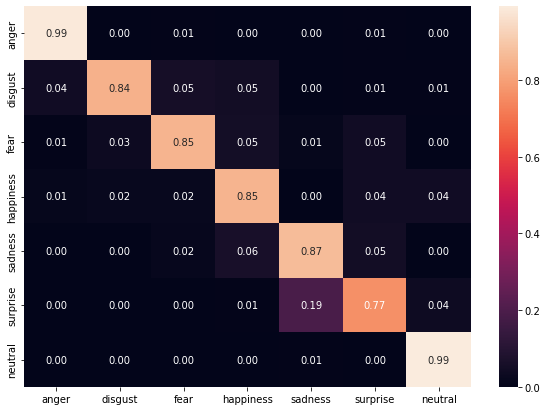

In [50]:
df_cm = pd.DataFrame(confusion_matrix(yhat, actual, normalize='true'), index = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral'], columns = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral'])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='.2f')

## Accuracy Graph

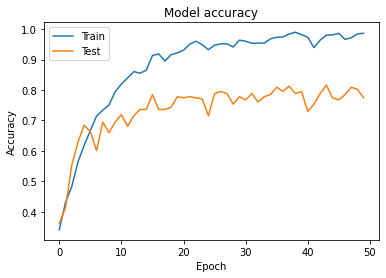

In [45]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Loss Graph

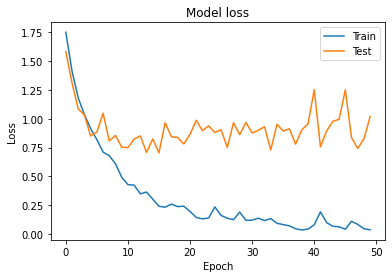

In [46]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper right') 
plt.show()